# Projet P10 - Détectez des faux billets avec R ou Python
*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray - Juin 2023*
<hr>

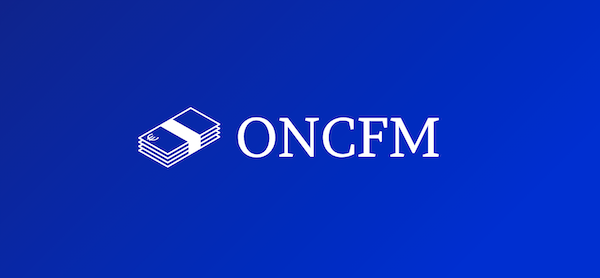

# <font color='blue'>Modèle final</font>

L’Organisation nationale de lutte contre le faux-monnayage, ou ONCFM, est une organisation publique ayant pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Dans le cadre de cette lutte, ils souhaitent mettre en place un algorithme qui soit capable de différencier automatiquement les vrais des faux billets.

Lorsqu’un billet arrive, une machine consigne l’ensemble de ses caractéristiques géométriques. Au travers de ses années de lutte, ONCFM a observé des différences de dimensions entre les vrais et les faux billets. Ces différences sont difficilement notables à l’oeil nu, mais une machine peut sans problème arriver à les différencier.
Ainsi, l'objectif de la mission est de construire un algorithme qui, à partir des caractéristiques géométriques d’un billet, serait capable de définir automatiquement si ce dernier est un vrai ou un faux billet.

## <font color='green'>1. Importation des librairies<a class="anchor" id="1_1"></a></font>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## <font color='green'>2. Entraînement du modèle<a class="anchor" id="1_2"></a></font>

In [2]:
# Importation du fichier complet
billets_mlr = pd.read_csv('billets_mlr.csv', index_col=0)
billets_mlr.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
billets_mlr.shape

(1500, 7)

In [4]:
# Création de l'échantillon d'entraînement et de l'échantillon de test
# Stratify = répartition homogène de vrais et faux billets dans les échantillons des tests et entraînement
X = billets_mlr[['height_right','margin_low','margin_up', 'length']]
y = billets_mlr['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
# Standardisation des données
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.values)

In [5]:
# Instanciation et entraînement du modèle de régression logistique
reg_log = LogisticRegression(penalty=None,solver='lbfgs',random_state=42)
reg_log.fit(X_train_s,y_train)

LogisticRegression(penalty=None, random_state=42)

## <font color='green'>3. Fonction de détection des faux billets<a class="anchor" id="1_3"></a></font>


In [6]:
def detection_fx_billets(model, nom_fichier):
    """
    Fonction permettant la détection de faux billets à partir d'un algorithme de classification déjà entraîné
    """
    
    # Importation des données
    df = pd.read_csv(nom_fichier)
    
    # Sélection des données significatives de la régression logistique
    X = df[['height_right','margin_low','margin_up','length']]
    
    # Standardisation des données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.values)
    
    # Prédictions et probabilités
    pred = model.predict(X_scaled)
    predict_proba = model.predict_proba(X_scaled)[:,1]
    threshold_optim = 0.6 # Définition du seuil
    y_pred = (predict_proba >= threshold_optim) # Classification en fonction du seuil
    
    # Affichage des résultats
    df_pred = df.copy()
    df_pred['prediction'] = y_pred
    df_pred['probabilité vrai %'] = np.round(predict_proba*100,2)

    return df_pred

In [7]:
detection_fx_billets(reg_log, 'billets_production.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction,probabilité vrai %
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.23
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.09
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.07
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,100.00
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,100.00
